<a href="https://colab.research.google.com/github/AbeerAbuZayed/Quora-Insincere-Questions-Classification/blob/master/Quora_Insincere_Questions_Classification_Data-Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quora Insincere Questions Classification
[Quora](https://www.quora.com/) is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.
[Competition: Quora Insincere Questions Classification](https://https://www.kaggle.com/c/quora-insincere-questions-classification)

##Problem statement:
  Build a model to classify whether a question asked on Quora is sincere or not.

To help Quora uphold their policy of “Be Nice, Be Respectful” and continue to be a place for sharing and growing the world’s knowledge.

##Overview of the data:

Quora provided a good amount of training and test data to identify the insincere questions. Train data consists of 1.3 million rows and 3 features in it. And the Test data consists of 300K rows and 2 features. 

## Evaluation Metrics :
Metric is F1 Score between the predicted and the observed targets. There are just two classes, but the positive class makes just over 6% of the total. So the target is highly imbalanced, which is why a metric such as F1 seems appropriate for this kind of problem as it considers both precision and recall of the test to compute the score.


# 1. Data loading and exploration:

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
   
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



import os
print(tf.__version__)
 

2.0.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! ls "/content/drive/My Drive/quora_data"

glove.840B.300d			paragram_300_sl999     test_data.txt
GoogleNews-vectors-negative300	sample_submission.csv  train.csv
insincere.txt			sincere.txt	       wiki-news-300d-1M
my_submission.csv		test.csv


##Load the data from CSV files into a pandas dataframe

In [0]:
import pandas as pd 
train_data = pd.read_csv('/content/drive/My Drive/quora_data/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/quora_data/test.csv')

In [0]:
train_data.head(10)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0
8,00005bd3426b2d0c8305,"Is there such a thing as dressing moderately, ...",0
9,00006e6928c5df60eacb,Is it just me or have you ever been in this ph...,0


In [0]:
#test_data.head(10)

In [0]:
print("Train shape : ", train_data.shape)
print("Test shape : ", test_data.shape)

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [0]:
train_data.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [0]:
train_data= train_data.drop(['qid'], axis=1)
test_data= test_data.drop(['qid'], axis=1)

In [0]:
test_data.head(10)

,question_text
0,Why do so many women become so rude and arroga...
1,When should I apply for RV college of engineer...
2,What is it really like to be a nurse practitio...
3,Who are entrepreneurs?
4,Is education really making good people nowadays?
5,How do you train a pigeon to send messages?
6,What is the currency in Langkawi?
7,"What is the future for Pandora, can the busine..."
8,My voice range is A2-C5. My chest voice goes u...
9,How much does a tutor earn in Bangalore?


In [0]:
train_data.isnull().sum()

question_text    0
target           0
dtype: int64

In [0]:
test_data.isnull().sum()

question_text    0
dtype: int64

#2. Data Visualization:

##Target Count:

In [0]:
#train_data["target"].value_counts().plot(kind='bar')

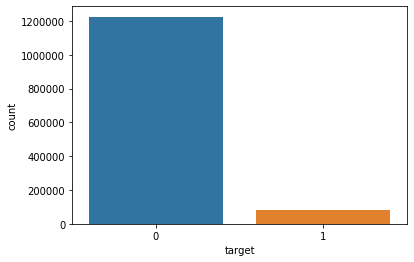

In [0]:
sns.countplot(train_data['target'])

In [0]:
train_data['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

##Target distribution:


In [0]:
sincere_percent= (len(train_data.question_text[train_data['target'] == 0]) /  len(train_data['question_text']) * 100)
insincere_percent= (len(train_data.question_text[train_data['target'] == 1]) / len(train_data['question_text']) * 100)

In [0]:
print(sincere_percent, insincere_percent)

93.81298224821265 6.187017751787352


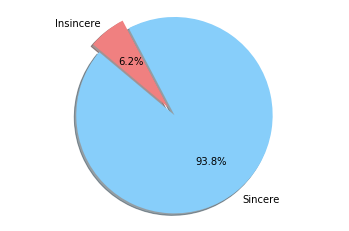

In [0]:
import matplotlib.pyplot as plt
# Data to plot
labels = 'Sincere', 'Insincere'
sizes = [sincere_percent, insincere_percent]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

##Word Cloud:
Let us look at the frequently occuring words in the data by creating a word cloud on the 'question_text' column.

In [0]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [0]:
from collections import defaultdict
train1_data = train_data[train_data["target"]==1]
train0_data = train_data[train_data["target"]==0]

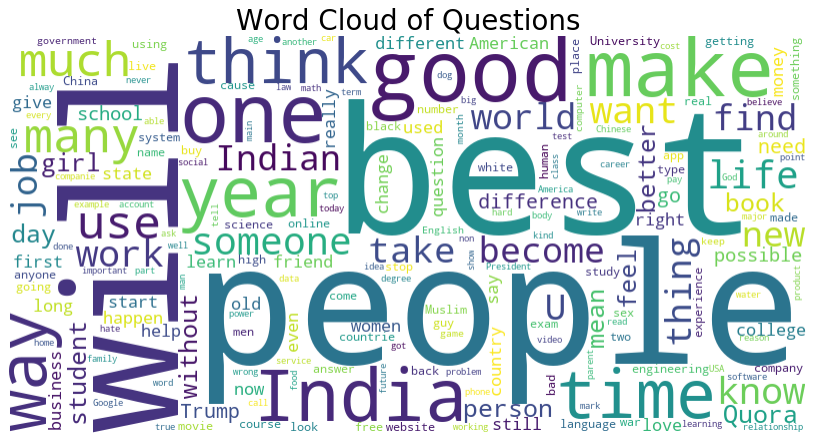

In [0]:
def cloud(text, title, size = (10,7)):
    # Processing Text
    wordcloud = WordCloud(width=800, height=400, background_color ='white',
                          collocations=False
                         ).generate(" ".join(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=25,color='k')
    plt.tight_layout(pad=0)
    plt.show()
cloud(train_data['question_text'], title="Word Cloud of Questions")

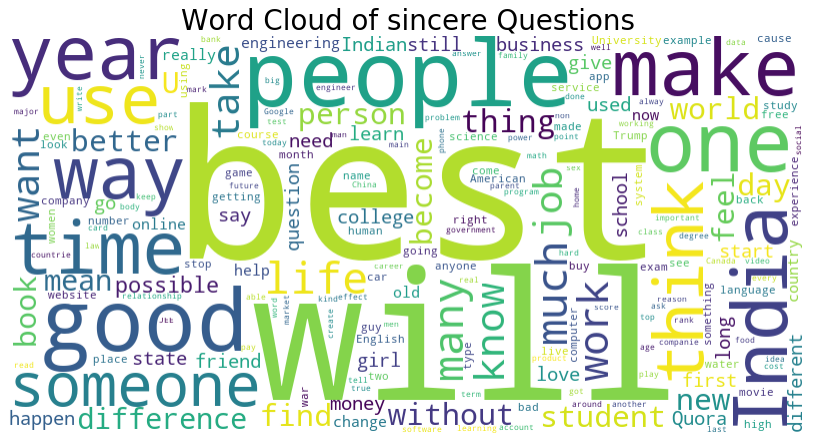

In [0]:
cloud(train0_data["question_text"], title="Word Cloud of sincere Questions")

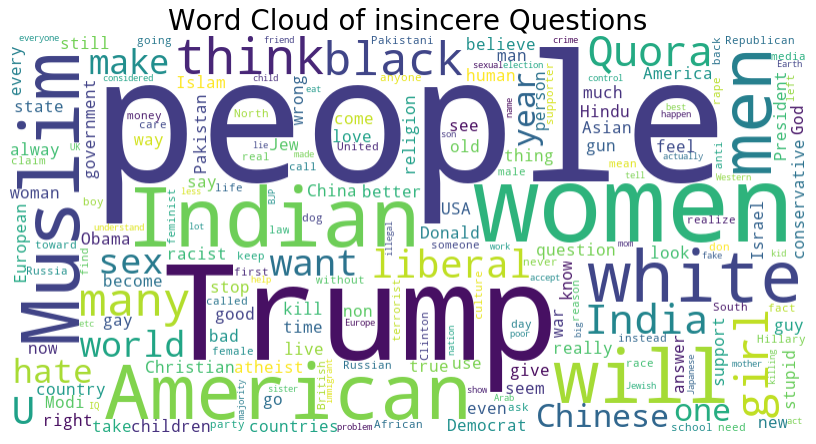

In [0]:
cloud(train1_data["question_text"], title="Word Cloud of insincere Questions")

##Word Frequency plot of sincere & insincere questions:

## Build language model:

In [0]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


## Unigram model:

In [0]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_data["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted0 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted0.columns = ["word", "wordcount"]

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_data["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted1 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted1.columns = ["word", "wordcount"]


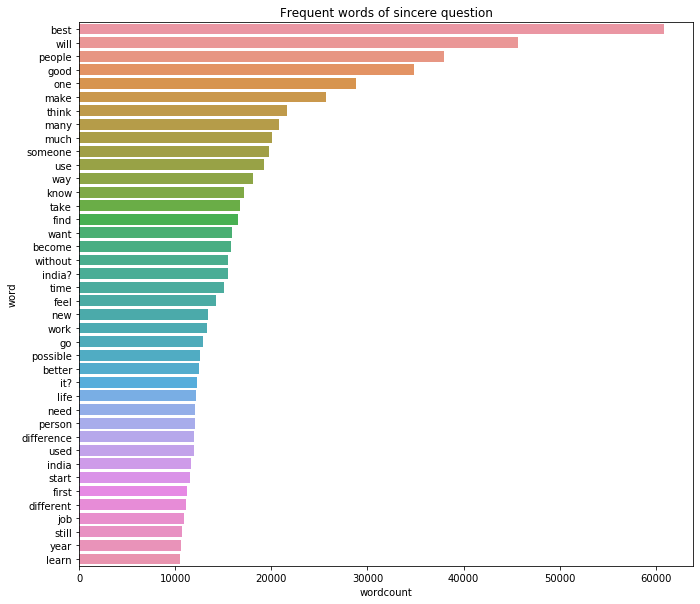

In [0]:
import seaborn as sns
plt.figure(figsize=(11,10))
plt.title("Frequent words of sincere question")
fd_sorted0_head= fd_sorted0.head(40)
sns.barplot(x=fd_sorted0_head['wordcount'], y=fd_sorted0_head['word'])

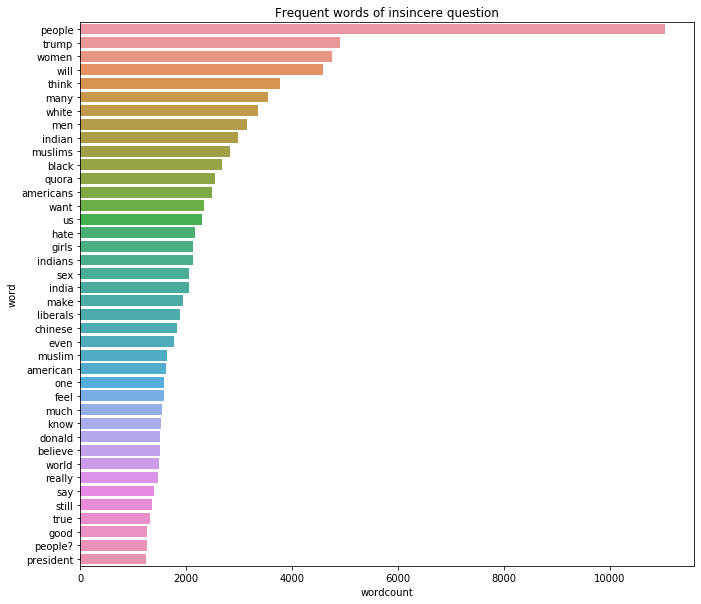

In [0]:
plt.figure(figsize=(11,10))
plt.title("Frequent words of insincere question")
fd_sorted1_head= fd_sorted1.head(40)
sns.barplot(x=fd_sorted1_head['wordcount'], y=fd_sorted1_head['word'])

##Observations:

Some of the top words are common across both the classes like 'people', 'will', 'think' etc

In [0]:
## Bigram model:

In [0]:
freq_dict = defaultdict(int)
for sent in train0_data["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted0 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted0.columns = ["word", "wordcount"]

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_data["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted1 = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted1.columns = ["word", "wordcount"]

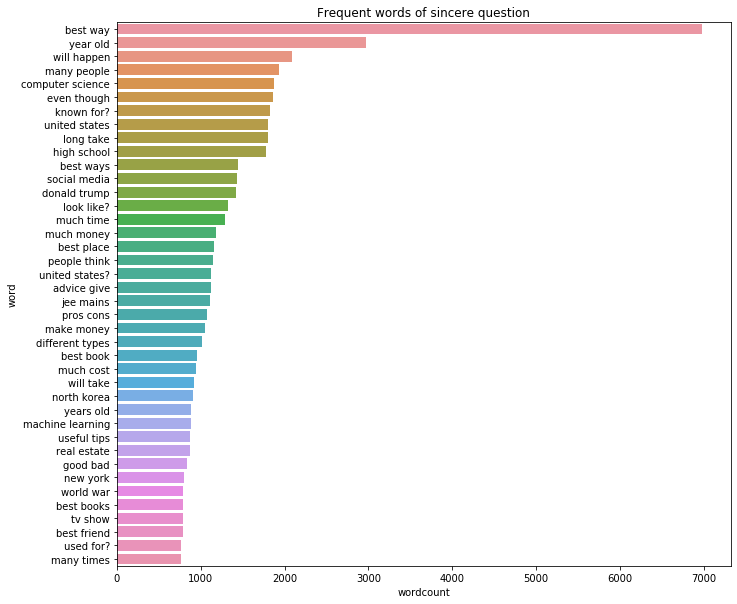

In [0]:
import seaborn as sns
plt.figure(figsize=(11,10))
plt.title("Frequent words of sincere question")
fd_sorted0_head= fd_sorted0.head(40)
sns.barplot(x=fd_sorted0_head['wordcount'], y=fd_sorted0_head['word'])

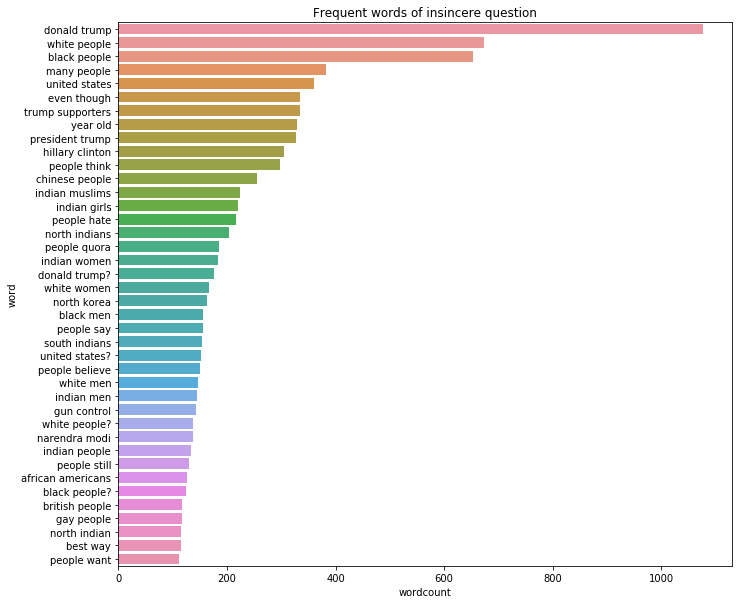

In [0]:
import seaborn as sns
plt.figure(figsize=(11,10))
plt.title("Frequent words of insincere question")
fd_sorted1_head= fd_sorted1.head(40)
sns.barplot(x=fd_sorted1_head['wordcount'], y=fd_sorted1_head['word'])